# Análise do dataset com as músicas mais populares do TikTok

Esse notebook tem por objetivo documentar o processo de análise exploratória de um dataset com as músicas mais populates da rede social TikTok nos últimos anos. Pretendemos explorar e destrinchar os dados, procurando por relações entre os atributos das músicas e a popularidade delas, tentando estabelecer, principalmente, relações de causalidade (se possível).

In [1]:
import pandas as pd

In [2]:
# Carrega os databases. O primeiro será usado para análise efetivamente e o segundo para encontrar as demais informações de uma música específica se necessário.

maindb = pd.read_csv('../data/numeric_columns.csv')
references = pd.read_csv('../data/tiktok_clean.csv')

In [3]:
maindb.head()

,track_id,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year
0,6kVuF2PYLuvl9T85XjNbaO,302186,28,0.597,0.800,1,-5.423,0,0.3120,0.0461,0.000000,0.1800,0.565,155.932,5.036433,2011
1,1RGIjMFMgJxkZHMDXVYzOJ,238800,75,0.832,0.391,8,-8.504,1,0.0628,0.0564,0.000000,0.2240,0.436,104.961,3.980000,2007
2,1dIWPXMX4kRHj6Dt2DStUQ,161684,76,0.571,0.767,2,-5.160,1,0.2870,0.3360,0.000000,0.0809,0.605,93.421,2.694733,2020
3,4QVS8YCpK71R4FsxSMCjhP,218295,72,0.548,0.839,6,-2.371,1,0.0644,0.1350,0.000000,0.1020,0.314,98.932,3.638250,2018
4,7BoobGhD4x5K96Me0hqC8Q,122772,89,0.855,0.463,3,-7.454,1,0.0367,0.2170,0.000018,0.3470,0.866,102.931,2.046200,2021


In [4]:
maindb.tail()

,track_id,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year
4024,1lNHWPDvKEbamKezpLq7HW,160346,64,0.788,0.473,0,-12.744,1,0.0328,0.4890,0.254000,0.1090,0.810,105.429,2.672433,2020
4025,7gd01LMH2gBcoDngSt8sq9,265813,70,0.670,0.676,8,-4.725,1,0.0370,0.0201,0.000000,0.1100,0.349,114.974,4.430217,2011
4026,5PYQUBXc7NYeI1obMKSJK0,223523,77,0.770,0.882,8,-4.792,1,0.0602,0.1940,0.000000,0.3160,0.385,99.991,3.725383,2019
4027,37f4ITSlgPX81ad2EvmVQr,204013,79,0.564,0.714,7,-4.987,1,0.1290,0.0549,0.000000,0.1550,0.330,175.924,3.400217,2016
4028,60jpDubMmVyR5molJp2TCm,175813,19,0.791,0.733,9,-3.852,1,0.3500,0.0305,0.000169,0.0423,0.913,159.974,2.930217,2020


In [5]:
maindb.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year
count,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000
mean,193154.008935,55.348474,0.726902,0.633814,5.250434,-6.907568,0.583768,0.136890,0.213532,0.037413,0.181555,0.536508,120.695360,3.219233,2017.496897
std,56955.259133,22.061397,0.140520,0.179224,3.675529,2.945024,0.492994,0.126596,0.235999,0.146924,0.137107,0.233558,26.113913,0.949254,5.778543
min,43426.000000,1.000000,0.150000,0.023700,0.000000,-26.888000,0.000000,0.023200,0.000010,0.000000,0.020000,0.033100,54.367000,0.723767,1960.000000
25%,156195.000000,42.000000,0.648000,0.514000,1.000000,-8.424000,0.000000,0.046400,0.030100,0.000000,0.093900,0.358000,100.062000,2.603250,2018.000000
50%,186460.000000,60.000000,0.742000,0.641000,5.000000,-6.456000,1.000000,0.082300,0.121000,0.000001,0.124000,0.537000,121.294000,3.107667,2020.000000
75%,222093.000000,72.000000,0.830000,0.768000,8.000000,-4.902000,1.000000,0.194000,0.314000,0.000307,0.236000,0.724000,134.989000,3.701550,2020.000000
max,632625.000000,100.000000,0.990000,0.999000,11.000000,1.077000,1.000000,0.911000,0.991000,0.962000,0.952000,0.998000,216.053000,10.543750,2021.000000


In [6]:
for col_name in maindb.drop('track_id', axis=1):
    col = maindb.drop('track_id', axis=1)[col_name]
    rng = col.max() - col.min()
    var = col.var(ddof=1)
    std = col.std(ddof=1)
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


duration:
 - Range: 589199.00
 - Variance: 3243901542.95
 - Std.Dev: 56955.26

popularity:
 - Range: 99.00
 - Variance: 486.71
 - Std.Dev: 22.06

danceability:
 - Range: 0.84
 - Variance: 0.02
 - Std.Dev: 0.14

energy:
 - Range: 0.98
 - Variance: 0.03
 - Std.Dev: 0.18

key:
 - Range: 11.00
 - Variance: 13.51
 - Std.Dev: 3.68

loudness:
 - Range: 27.97
 - Variance: 8.67
 - Std.Dev: 2.95

mode:
 - Range: 1.00
 - Variance: 0.24
 - Std.Dev: 0.49

speechiness:
 - Range: 0.89
 - Variance: 0.02
 - Std.Dev: 0.13

acousticness:
 - Range: 0.99
 - Variance: 0.06
 - Std.Dev: 0.24

instrumentalness:
 - Range: 0.96
 - Variance: 0.02
 - Std.Dev: 0.15

liveness:
 - Range: 0.93
 - Variance: 0.02
 - Std.Dev: 0.14

valence:
 - Range: 0.96
 - Variance: 0.05
 - Std.Dev: 0.23

tempo:
 - Range: 161.69
 - Variance: 681.94
 - Std.Dev: 26.11

duration_mins:
 - Range: 9.82
 - Variance: 0.90
 - Std.Dev: 0.95

release_year:
 - Range: 61.00
 - Variance: 33.39
 - Std.Dev: 5.78



Agora serão gerados gráficos de uso geral para a análise exploratória.

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']  = (8, 8)
plt.rcParams['axes.labelsize']  = 10
plt.rcParams['axes.titlesize']  = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['lines.linewidth'] = 2
plt.ion()
plt.style.use('seaborn-colorblind')

/tmp/ipykernel_31174/3665085733.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


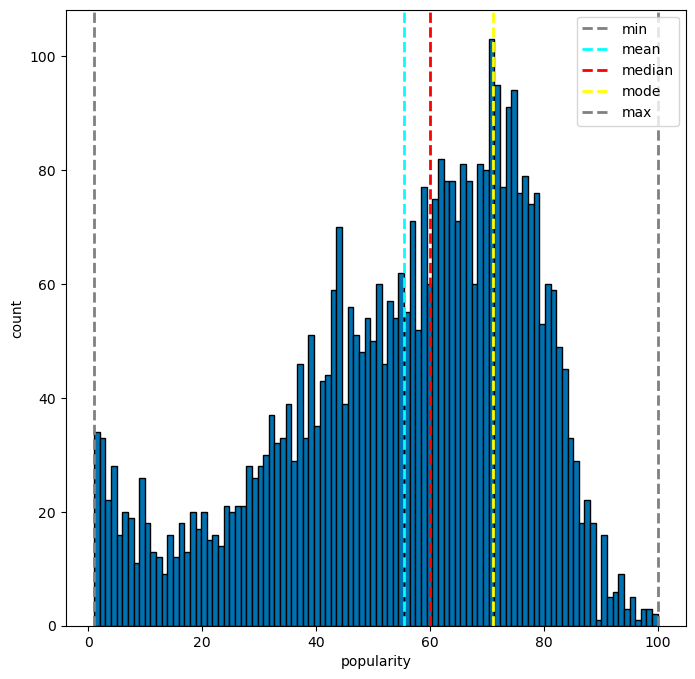

In [8]:
popularity = maindb['popularity']

plt.hist(popularity, edgecolor='k', bins = 100)
plt.xlabel('popularity')
plt.ylabel('count')

min_ = popularity.min()
max_ = popularity.max()
mean = popularity.mean()
median = popularity.median()
mode = popularity.mode()[0]

# Linhas para cada estatística
plt.axvline(x=min_, color = 'gray', linestyle='dashed', linewidth = 2, label='min')
plt.axvline(x=mean, color = 'cyan', linestyle='dashed', linewidth = 2, label='mean')
plt.axvline(x=median, color = 'red', linestyle='dashed', linewidth = 2, label='median')
plt.axvline(x=mode, color = 'yellow', linestyle='dashed', linewidth = 2, label='mode')
plt.axvline(x=max_, color = 'gray', linestyle='dashed', linewidth = 2, label='max')

# Adiciona uma legenda
plt.legend(loc=0)

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
#demora alguns minutos pra gerar

#sns.pairplot(numericmaindb)

In [ ]:
sns.pairplot(data=numericmaindb, x_vars=['popularity'], y_vars=numericmaindb.columns, height = 10, aspect = 1)

In [ ]:
plt.figure(figsize = (15,5))
sns.heatmap(data = numericmaindb.corr(), cmap='Blues', cbar=False, annot=True, linecolor='k', linewidths=1)

In [ ]:
min_dur = maindb['duration_mins'].min()
max_dur = maindb['duration_mins'].max()
mean_dur = maindb['duration_mins'].mean()
median_dur = maindb['duration_mins'].median()

print("Duração mínima (minutos):", round(min_dur, 2))
print("Duração máxima (minutos):", round(max_dur, 2))

maindb.plot.hist(y='duration_mins', edgecolor='k', bins = 100)
plt.title('Histograma da duração das músicas (em minutos)')
plt.xlabel('Duração')
plt.ylabel('Num. músicas')

plt.axvline(min_dur, color = 'green', linestyle='dashed', label='min')
plt.axvline(mean_dur, color = 'cyan', linestyle='dashed', label='mean')
plt.axvline(median_dur, color = 'red', linestyle='dashed', label='median')
plt.axvline(max_dur, color = 'orange', linestyle='dashed', label='max')

plt.legend(loc=1)

In [ ]:
min_year = maindb['release_year'].min()
max_year = maindb['release_year'].max()
mean_year = maindb['release_year'].mean()
median_year = maindb['release_year'].median()

print("Ano de lançamento da música mais antiga:", min_year)
print("Ano de lançamento da música mais recente:", max_year)

maindb.plot.hist(y='release_year', edgecolor='k', bins = 50)
plt.title('Histograma do ano de lançamento das músicas')
plt.xlabel('Ano de lançamento')
plt.ylabel('Num. músicas')

plt.axvline(min_year, color = 'green', linestyle='dashed', label='min')
plt.axvline(mean_year, color = 'cyan', linestyle='dashed', label='mean')
plt.axvline(median_year, color = 'red', linestyle='dashed', label='median')
plt.axvline(max_year, color = 'orange', linestyle='dashed', label='max')

plt.legend(loc=2)

In [ ]:
plt.scatter(maindb['release_year'], maindb['popularity'], edgecolor='k', alpha=0.75)
plt.title('Ano de lançamento x Popularidade')
plt.xlabel('Ano de lançamento')
plt.ylabel('Popularidade')

In [ ]:
plt.scatter(maindb['danceability'], maindb['popularity'], edgecolor='k', alpha=0.75)
plt.title('Dançabilidade x Popularidade')
plt.xlabel('Dançabilidade')
plt.ylabel('Popularidade')

In [ ]:
# Speechiness é uma métrica que mede a presença de palavras faladas na track, valores altos
# indicam que ela é composta majoriatariamente por fala (podcasts, etc) e valores baixos
# remetem a músicas ou músicas do tipo sem fala

plt.scatter(maindb['speechiness'], maindb['popularity'], edgecolor='k', alpha=0.75)
plt.title('Presença de fala x Popularidade')
plt.xlabel('Presença de fala')
plt.ylabel('Popularidade')

In [ ]:
plt.scatter(maindb['duration_mins'], maindb['popularity'], edgecolor='k', alpha=0.75)
plt.title('Duração (em minutos) x Popularidade')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Popularidade')

In [ ]:
interesting_cols = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness']
song_specs = maindb[cols]

sns.pairplot(song_specs)

In [ ]:
sns.pairplot(df[interesting_cols], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [ ]:
plt.figure(figsize = (15,5))
sns.heatmap(data=maindb.corr(), cbar=False, annot=True, linecolor='k', linewidths=1)

In [ ]:
X = maindb.drop('track_id', axis=1)
Y = maindb['popularity']

reg = LinearRegression()
reg.fit(X, Y)

print("O modelo é: Popularidade = {:.5} + {:.5}*duration + {:.5}*danceability + {:.5}*energy + {:.5}*loudness + {:.5}*speechiness + {:.5}*acousticness + {:.5}*instrumentalness + {:.5}*release_year".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.coef_[6], reg.coef_[7]))

In [ ]:
X = np.column_stack((maindb['duration'], maindb['danceability'], maindb['energy'], maindb['loudness'],
                     maindb['speechiness'], maindb['acousticness'], maindb['instrumentalness'],
                     maindb['release_year']))
y = maindb['popularity']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()


print(est2.summary())